# Portugal Wine Dataset Exploration
## Author: Rodrigo de Lima Florindo (Matrícula: 101809)
The code below shows an exploratory analysis of the Portugal's wines dataset. If you want to reproduce the results in vscode, please read the README.md file present in the folder that contains this file.

In the next code block, we install the `Numpy`, `Pandas`, `Matplotlib`, `LabelEncoder` (from `scikit-learn`), and the `ucimlrepo` libraries. While the four first libraries are used for linear algebra, dataset management, transformation from string to numeric, and figure plotting, respectively, while the latter one is used to fetch the wine dataset from the [UCI Irvine Machine Learning repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 

1. _Download the dataset available in the UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/wine+quality. Generate a single spreadsheet for both white and red wine data._ **Done in the code block below**
2. Display the dimensions of the data matrix and the label vector. **Also done in the code block below**
3. _Perform a thorough analysis of the dataset. Points to be considered:_
   1. _Is the dataset consistent?_ **Yes, it has representative samples of white and red wine features.** 
   2. _Are there missing values?_  **No, the dataset has no missing values, as it is possible to observe in the "Dataset Information" section in the [UCI repository](https://archive.ics.uci.edu/dataset/186/wine+quality)**
   3. _Are there non-numeric values?_  **Yes, only the color that is defined as "categorical".**
   4. _Is the dataset balanced (consider the classes red wine and white wine)?_ **No, the dataset contains 4898 and 1599 white and red wines features, respectively.**

   _*Suggestion:* Read the article *Modeling wine preferences by data mining from physicochemical properties* — Cortez et al., 2009._

In [12]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata 
print(wine_quality.metadata) 
# variable information 
print(wine_quality.variables)
# Seeing which keys does it have for accessing
print(wine_quality.data.keys())
# I found that the .original key also shows the color of the wines in the last column
print(wine_quality.data.original)
colors = wine_quality.data.original['color']
# Count how many red and white wines
counts = colors.value_counts()
n_red = counts.get('red')
n_white = counts.get('white')

# Amount of red wines in the dataset
print("Amount of red wines:", n_red)
# Amount of white wines in the dataset
print("Amount of white wines:", n_white)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

4. _Present a statistical analysis of the data that supports which input variables are most relevant if we want to classify the wine by type (red vs. white). Justify._ **We can analise the mean and the variances of each feature for red and white wines, in order to identify which ones are the most different. This approach helps to have an initial guess on which features better represents red and white wines. For more robust features evaluation it would be importanto to apply statistical or machine learning techniques, such as the t-test or the Random Forest Classifier, respectively.**
5. _Choose two of the input variables and create a scatter plot to visualize the distribution of the data for each wine class. Justify your choice._ **Looking the statistical analysis of the features of red and white wines, available in the output table of the code block below, we can choose the `free_sulfur_dioxide` and the `chlorides` features as possible candidates to be used for classifying the wine colors. It is possible to observe the scatter plot in the output of the code block below. Among all features, these two are the ones that was found to better separate (visually) the cloud of points in the scatter plot.**

In [13]:
# Encode color to binary
#y = pd.Series(colors).str.strip().str.lower()
colors_encoded = LabelEncoder().fit_transform(colors)  # red=0, white=1

# Split features by class
X_red   = X[colors_encoded == 0]
X_white = X[colors_encoded == 1]

# --- 1) Basic statistics per class ---
stats = []
for col in X.columns:
    mean_red   = X_red[col].mean()
    mean_white = X_white[col].mean()
    std_red    = X_red[col].std()
    std_white  = X_white[col].std()
    mean_diff  = abs(mean_red - mean_white)

    stats.append({
        'Feature': col,
        'Mean_Red': mean_red,
        'Mean_White': mean_white,
        'Std_Red': std_red,
        'Std_White': std_white,
        'Mean_Diff': mean_diff,
    })

stats_df = pd.DataFrame(stats)

# --- 5) Display results ---
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')
print(stats_df)

                 Feature  Mean_Red  Mean_White  Std_Red  Std_White  Mean_Diff
0          fixed_acidity    8.3196      6.8548   1.7411     0.8439     1.4648
1       volatile_acidity    0.5278      0.2782   0.1791     0.1008     0.2496
2            citric_acid    0.2710      0.3342   0.1948     0.1210     0.0632
3         residual_sugar    2.5388      6.3914   1.4099     5.0721     3.8526
4              chlorides    0.0875      0.0458   0.0471     0.0218     0.0417
5    free_sulfur_dioxide   15.8749     35.3081  10.4602    17.0071    19.4332
6   total_sulfur_dioxide   46.4678    138.3607  32.8953    42.4981    91.8929
7                density    0.9967      0.9940   0.0019     0.0030     0.0027
8                     pH    3.3111      3.1883   0.1544     0.1510     0.1228
9              sulphates    0.6581      0.4898   0.1695     0.1141     0.1683
10               alcohol   10.4230     10.5143   1.0657     1.2306     0.0913


Text(0, 0.5, 'Chlorides')

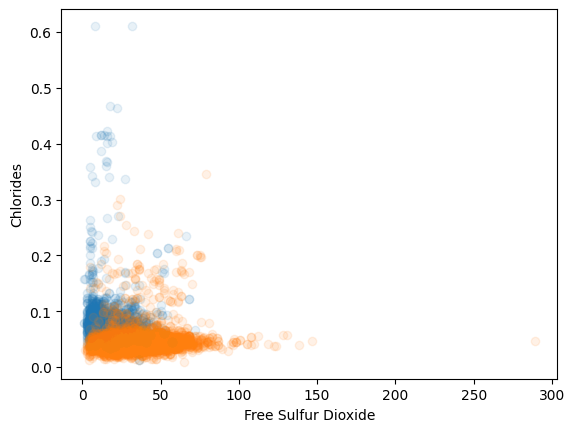

In [ ]:
plt.figure()
# alpha = 0.1 was configured to make it easier to observe the superposition of the cloud points
plt.scatter(X_red.free_sulfur_dioxide, X_red.chlorides, alpha=0.1)
plt.scatter(X_white.free_sulfur_dioxide, X_white.chlorides, alpha=0.1)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Chlorides")

6. _Now considering the wine quality variable, evaluate how the prevalence is in the two classes for the highest-rated wines (*score* > 7) and for those rated with *score* < 3._ **From the results of the code block below, we can infer that it is more common to have white wines (1060) as highest-rated wines than red wines (217), given that there are 1599 white wines and 4898 red wines in the dataset. Additionally, it is also more common to find low rated white wines (20) than red wines (10).**

In [15]:
# Masks
high_quality_mask = y.quality >= 7
low_quality_mask  = y.quality <= 3

# Counts for high quality
high_counts = colors[high_quality_mask].value_counts()

# Counts for low quality
low_counts = colors[low_quality_mask].value_counts()

print("High quality (>7):")
print(high_counts)
print("\nLow quality (<3):")
print(low_counts)

# Optional: put in one DataFrame for clarity
df_counts = pd.DataFrame({
    'High_Quality_(>7)': high_counts,
    'Low_Quality_(<3)': low_counts
}).fillna(0).astype(int)

print("\nSummary table:")
print(df_counts)

High quality (>7):
color
white    1060
red       217
Name: count, dtype: int64

Low quality (<3):
color
white    20
red      10
Name: count, dtype: int64

Summary table:
       High_Quality_(>7)  Low_Quality_(<3)
color                                     
white               1060                20
red                  217                10
